In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [56]:
import os
os.environ['KAGGLE_USERNAME'] = 'saikoushikkalakota'
os.environ['KAGGLE_KEY'] = '916dc3b0923ae538106de8d6fdd6e1fe'

In [3]:
#! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset --force

In [4]:
#! unzip-aes -p Password covid-face-mask-detection-dataset.zip

In [5]:
#! unzip-aes covid-face-mask-detection-dataset.zip

In [57]:
main_dir = r'C:\Users\raman\Imarticus\workSpace\MaskDetection\New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_No_mask_dir = os.path.join(train_dir,'Non Mask')

In [58]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[0:10])

['0003.jpg', '0006.jpg', '0018.jpg', '0019.jpg', '0022.jpg', '0027.jpg', '0029.jpg', '0037.jpg', '0040.jpg', '0042.jpg']


In [59]:
train_No_mask_names = os.listdir(train_No_mask_dir)
print(train_No_mask_names[0:10])

['0.jpg', '1.jpg', '1.png', '10.jpg', '10.png', '100.jpg', '100.png', '101.jpg', '101.png', '102.jpg']


In [60]:
mask_images = []

for i in train_mask_names:
    mask_images.append(os.path.join(train_mask_dir,i))

non_mask_images=[]

for i in train_No_mask_names:
    non_mask_images.append(os.path.join(train_No_mask_dir,i))

In [61]:
import plotly.express as px
from skimage import io
from skimage.transform import resize

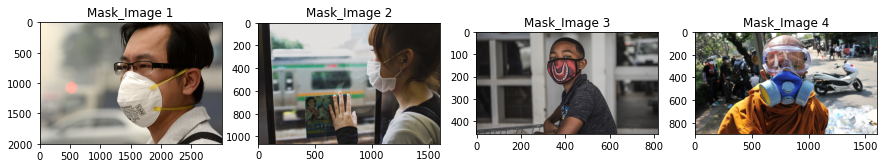

In [62]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
img1 = io.imread(mask_images[0])
img2 = io.imread(mask_images[1])
img3 = io.imread(mask_images[2])
img4 = io.imread(mask_images[3])

ax[0].imshow(img1)
ax[0].set_title("Mask_Image 1")

ax[1].imshow(img2)
ax[1].set_title("Mask_Image 2")

ax[2].imshow(img3)
ax[2].set_title("Mask_Image 3")

ax[3].imshow(img4)
ax[3].set_title("Mask_Image 4")


plt.show()


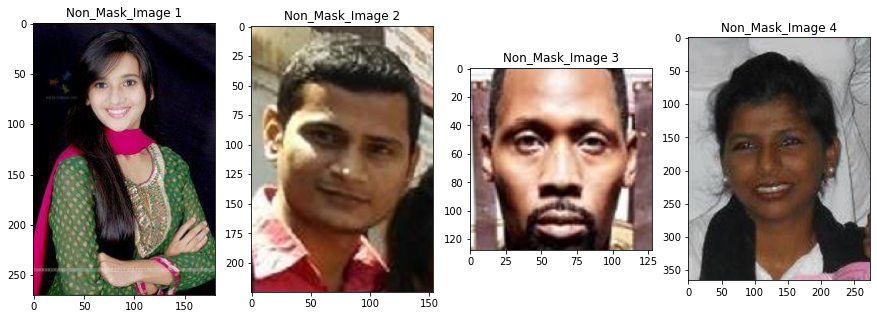

In [63]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
img1 = io.imread(non_mask_images[0])
img2 = io.imread(non_mask_images[1])
img3 = io.imread(non_mask_images[2])
img4 = io.imread(non_mask_images[3])

ax[0].imshow(img1)
ax[0].set_title("Non_Mask_Image 1")

ax[1].imshow(img2)
ax[1].set_title("Non_Mask_Image 2")

ax[2].imshow(img3)
ax[2].set_title("Non_Mask_Image 3")

ax[3].imshow(img4)
ax[3].set_title("Non_Mask_Image 4")


plt.show()


In [64]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   rotation_range=25,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(300,300),
                                                    batch_size=32,
                                                    class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(300,300),
                                                  batch_size=32,
                                                  class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(300,300),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 1128 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [65]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [66]:
train_generator.image_shape

(300, 300, 3)

In [67]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(300,300,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 150, 150, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 75, 75, 64)       

In [69]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [71]:
model_train = model.fit(train_generator,epochs=35,
          validation_data=valid_generator,
          batch_size=32)

Epoch 1/35
36/36 [==============================] - 335s 9s/step - loss: 0.7049 - accuracy: 0.5470 - val_loss: 0.6853 - val_accuracy: 0.7059
Epoch 2/35
36/36 [==============================] - 308s 9s/step - loss: 0.6641 - accuracy: 0.6046 - val_loss: 0.6775 - val_accuracy: 0.5588
Epoch 3/35
36/36 [==============================] - 303s 8s/step - loss: 0.6095 - accuracy: 0.6640 - val_loss: 0.6513 - val_accuracy: 0.7320
Epoch 4/35
36/36 [==============================] - 330s 9s/step - loss: 0.5215 - accuracy: 0.7624 - val_loss: 0.6133 - val_accuracy: 0.7549
Epoch 5/35
36/36 [==============================] - 285s 8s/step - loss: 0.4458 - accuracy: 0.8200 - val_loss: 0.5801 - val_accuracy: 0.7843
Epoch 6/35
36/36 [==============================] - 310s 9s/step - loss: 0.3989 - accuracy: 0.8564 - val_loss: 0.5493 - val_accuracy: 0.7941
Epoch 7/35
36/36 [==============================] - 295s 8s/step - loss: 0.3356 - accuracy: 0.8839 - val_loss: 0.5197 - val_accuracy: 0.8333
Epoch 8/35
36

In [72]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)

In [73]:
metrics.head(10)

,loss,accuracy,val_loss,val_accuracy
0,0.704886,0.546986,0.685256,0.705882
1,0.664055,0.604610,0.677547,0.558824
2,0.609508,0.664007,0.651318,0.732026
3,0.521538,0.762411,0.613251,0.754902
4,0.445771,0.820035,0.580113,0.784314
5,0.398939,0.856383,0.549250,0.794118
6,0.335622,0.883865,0.519690,0.833333
7,0.310009,0.888298,0.511550,0.784314
8,0.294665,0.900709,0.472117,0.816993
9,0.270088,0.906915,0.423724,0.852941


In [74]:
test_loss,test_accuracy = model.evaluate_generator(test_generator)

In [75]:
print('test_loss: ',test_loss)
print('test_accuracy: ',test_accuracy)

test_loss:  0.26338672637939453
test_accuracy:  0.8799999952316284


In [77]:
model.save("../new_improved_model1.h5")